In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("Superstore_USA.xlsx")
df.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [4]:
df.shape

(9426, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [6]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Distribution of Order Privority

In [9]:
privority=df['Order Priority'].value_counts()
privority

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [10]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [11]:
df['Order Priority']=df['Order Priority'].replace('Critical','Critical ')

In [12]:
privority=df['Order Priority'].value_counts().reset_index().sort_values("count",ascending=False)
privority

,Order Priority,count
0,High,1970
1,Low,1926
2,Not Specified,1881
3,Medium,1844
4,Critical,1805


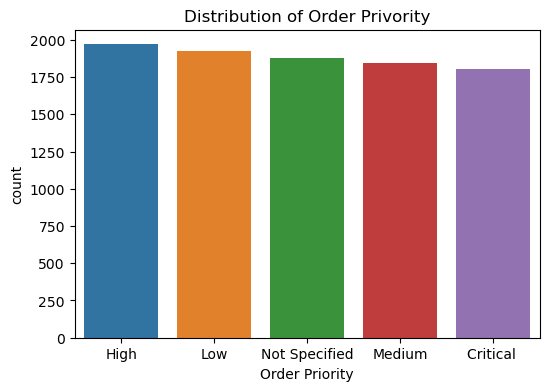

In [13]:
plt.figure(figsize=(6,4))

sns.barplot(x=privority['Order Priority'],y=privority['count'],data=privority)
plt.title("Distribution of Order Privority")
plt.savefig("Desktop\\Order Privority.png")
plt.show()

# Ship Mode

In [14]:
df['Ship Mode'].value_counts().reset_index()

,Ship Mode,count
0,Regular Air,7036
1,Delivery Truck,1283
2,Express Air,1107


In [15]:
ship=df.groupby('Ship Mode').count().reset_index()
ship

,Ship Mode,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,Delivery Truck,1283,1283,1283,1283,1283,1283,1283,1283,1283,...,1283,1283,1283,1283,1283,1283,1283,1283,1283,1283
1,Express Air,1107,1107,1107,1107,1107,1107,1107,1107,1107,...,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107
2,Regular Air,7036,7036,7036,7036,7036,7036,7036,7036,7036,...,7036,7036,7036,7036,7036,7036,7036,7036,7036,7036


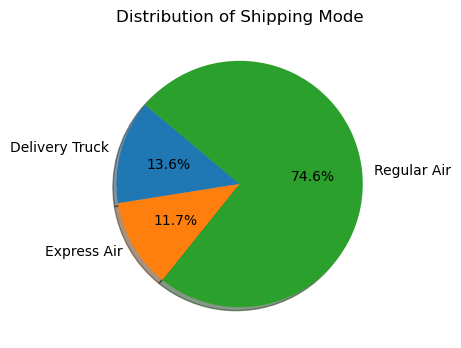

In [16]:
plt.figure(figsize=(6,4))

plt.pie(ship['Row ID'],labels=ship['Ship Mode'],autopct='%0.1f%%',shadow=True,startangle=140)
plt.title("Distribution of Shipping Mode")
plt.savefig("Desktop\\Ship_Mode.png")
plt.show()

In [17]:
ship_cost=df.groupby('Ship Mode')['Shipping Cost'].mean().reset_index()
ship_cost

,Ship Mode,Shipping Cost
0,Delivery Truck,45.197171
1,Express Air,8.039169
2,Regular Air,7.634974


# Compare Ship Mode on Shipping Cost

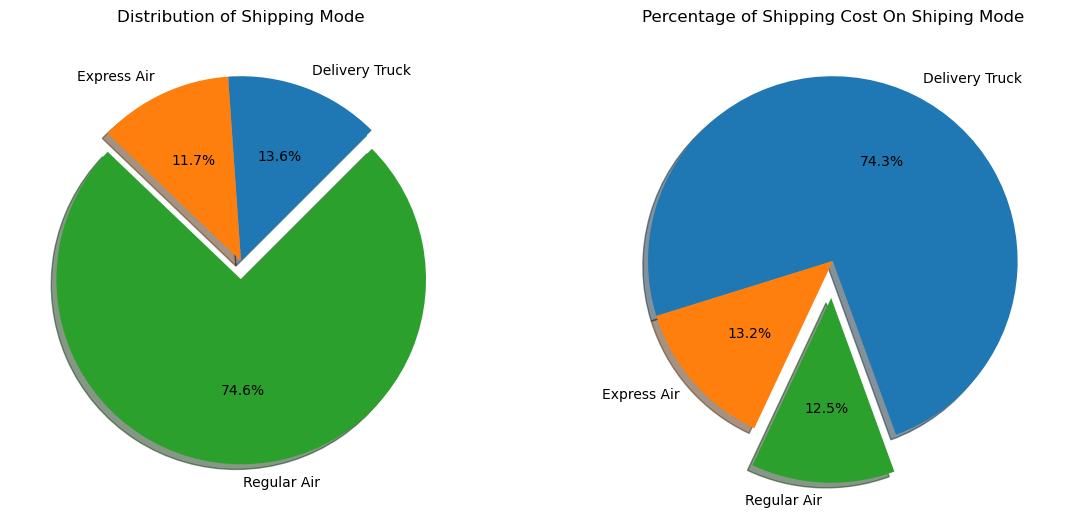

In [18]:
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax[0].pie(ship['Row ID'],labels=ship['Ship Mode'],autopct='%0.1f%%',shadow=True,startangle=45,explode=[0,0,0.1])
ax[1].pie(ship_cost['Shipping Cost'],labels=ship_cost['Ship Mode'],autopct='%0.1f%%',shadow=True,startangle=290,explode=[0,0,0.2])

ax[0].set_title("Distribution of Shipping Mode")
ax[1].set_title("Percentage of Shipping Cost On Shiping Mode")

plt.savefig("Desktop\\Compare_Ship_Mode.png")

plt.show()

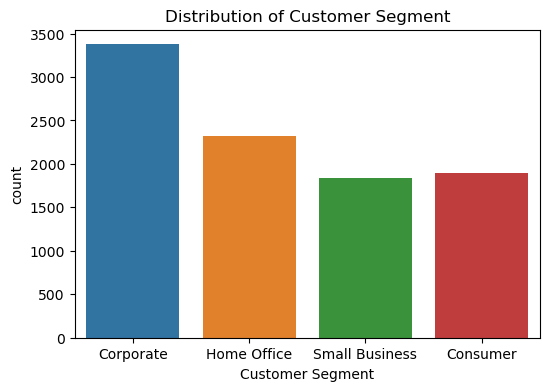

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Segment',data=df)
plt.savefig("Desktop\\Distribution_of_Customer_Segment.png")
plt.title("Distribution of Customer Segment")
plt.show()

# Compare Ship Mode Based on Product Category

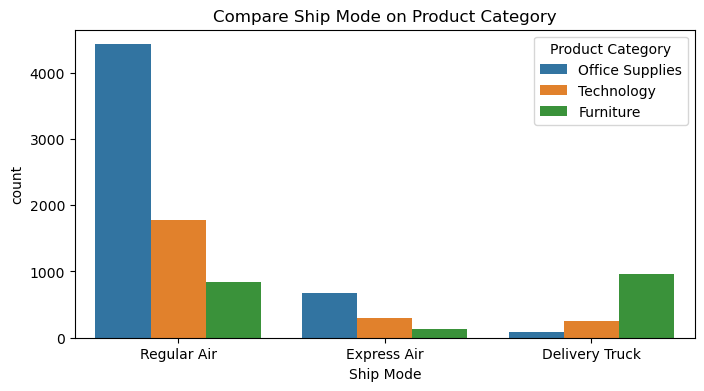

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x='Ship Mode',data=df,hue="Product Category")
plt.savefig("Desktop\\Compare_Ship_Mode on Product_Category.png")
plt.title("Compare Ship Mode on Product Category")
plt.show()

# Distribution of Customer Segment

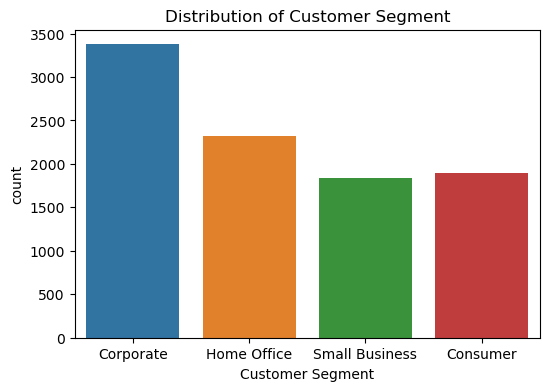

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Segment',data=df)
plt.savefig("Desktop\\Distribution_of_Customer_Segment.png")
plt.title("Distribution of Customer Segment")
plt.show()

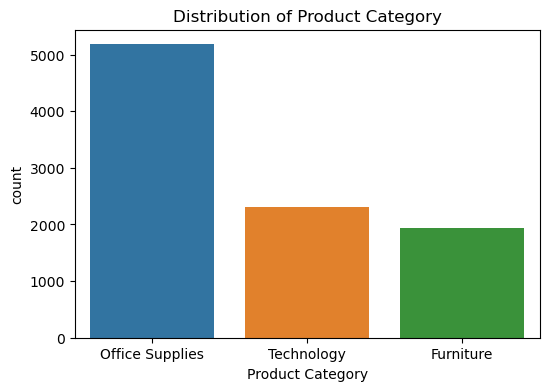

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=df)
plt.savefig("Desktop\\Distribution_of_Product_Category.png")
plt.title("Distribution of Product Category")
plt.show()

# Discount By Sub-Category

In [23]:
avg_discount_subcategory=df.groupby('Product Sub-Category')['Discount'].mean().reset_index().sort_values('Discount',ascending=False)

avg_discount_subcategory

,Product Sub-Category,Discount
5,Copiers and Fax,0.051735
11,Pens & Art Supplies,0.051512
12,Rubber Bands,0.051436
14,Storage & Organization,0.051082
0,Appliances,0.050752
9,Office Machines,0.050718
15,Tables,0.050594
1,Binders and Binder Accessories,0.050282
3,Chairs & Chairmats,0.050136
10,Paper,0.049246


In [24]:
highest_discount = avg_discount_subcategory.loc[avg_discount_subcategory['Discount'].idxmax()]
lowest_discount = avg_discount_subcategory.loc[avg_discount_subcategory['Discount'].idxmin()]

print("Subcategory with the highest discount:",highest_discount)
# print(highest_discount)

print("\nSubcategory with the lowest discount:",lowest_discount)
# print(lowest_discount)


Subcategory with the highest discount: Product Sub-Category    Copiers and Fax
Discount                       0.051735
Name: 5, dtype: object

Subcategory with the lowest discount: Product Sub-Category    Bookcases
Discount                 0.047427
Name: 2, dtype: object


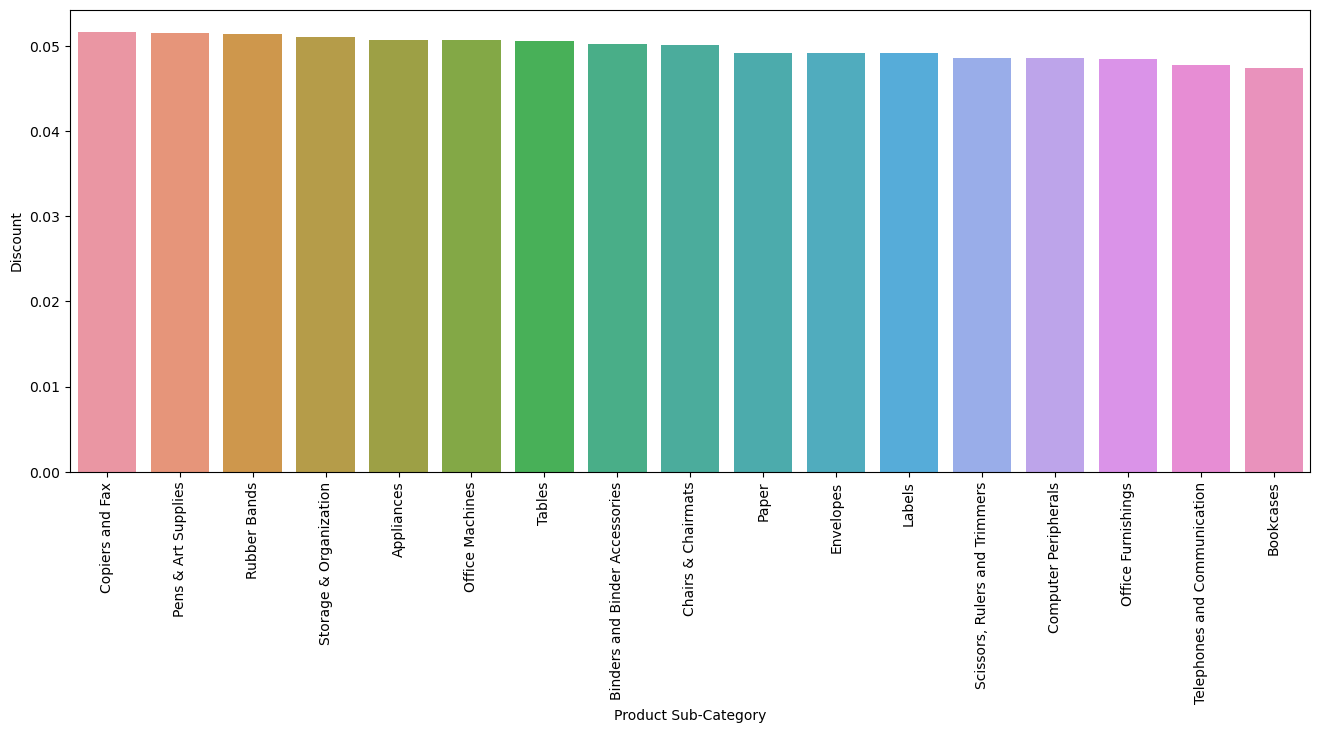

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(x=avg_discount_subcategory['Product Sub-Category'],y=avg_discount_subcategory['Discount'])
plt.xticks(rotation=90)
plt.show()

# Top and Bottom Discount State

In [26]:
avg_discount_state_top=df.groupby(['State or Province'])['Discount'].mean().reset_index().sort_values('Discount',ascending=False).head(5)

avg_discount_state_top

,State or Province,Discount
48,Wyoming,0.054762
16,Louisiana,0.054607
37,Rhode Island,0.054500
42,Utah,0.052534
21,Minnesota,0.052385


In [27]:
avg_discount_state_bottom=df.groupby('State or Province')['Discount'].mean().reset_index().sort_values('Discount',ascending=False).tail(5)

avg_discount_state_bottom

,State or Province,Discount
9,Georgia,0.045748
7,District of Columbia,0.045588
4,Colorado,0.045480
6,Delaware,0.044000
26,Nevada,0.041860


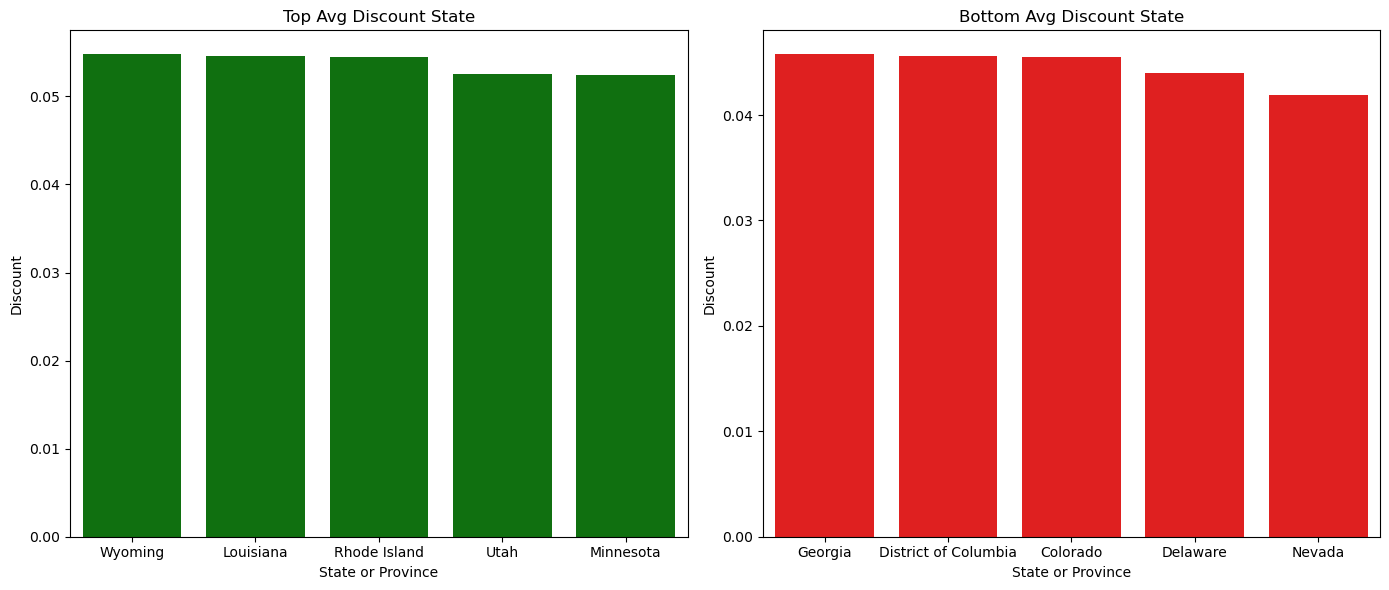

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].set_title('Top Avg Discount State')
sns.barplot(x=avg_discount_state_top['State or Province'],y=avg_discount_state_top['Discount'],data=avg_discount_state_top,ax=axes[0],color='Green')

sns.barplot(x=avg_discount_state_bottom['State or Province'],y=avg_discount_state_bottom['Discount'],data=avg_discount_state_bottom,ax=axes[1],color='Red')


axes[1].set_title('Bottom Avg Discount State')



plt.tight_layout()
plt.show()


In [29]:
avg_discount_region=df.groupby('Region')['Discount'].mean().reset_index().sort_values('Discount',ascending=False)
avg_discount_region

,Region,Discount
1,East,0.050000
3,West,0.049803
2,South,0.049401
0,Central,0.049348


<Axes: xlabel='Region', ylabel='Discount'>

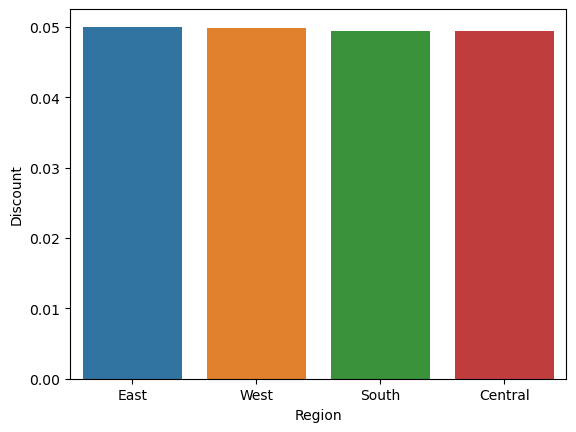

In [30]:
sns.barplot(x=avg_discount_region['Region'],y=avg_discount_region['Discount'])

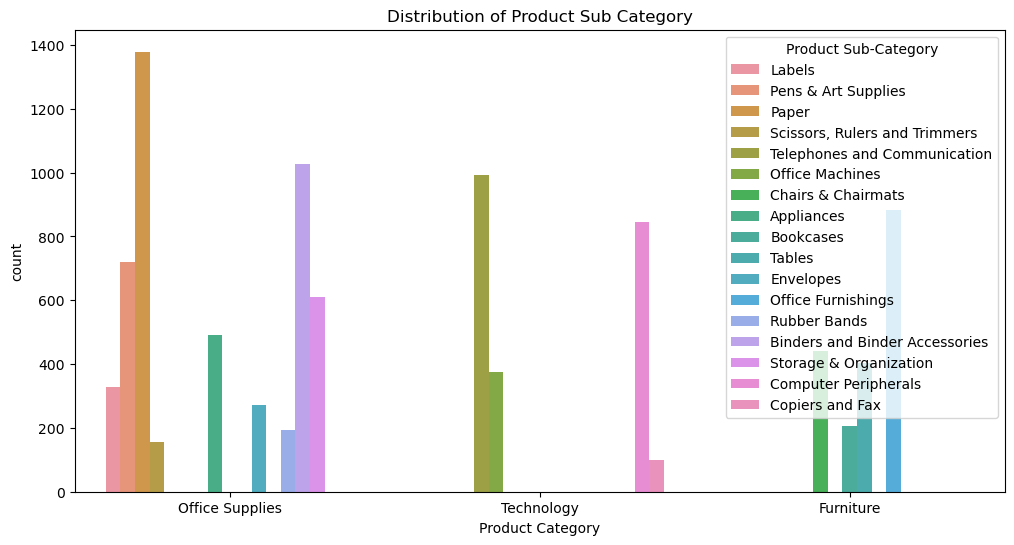

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='Product Category',data=df,hue="Product Sub-Category")
plt.savefig("Desktop\\Distribution_of_Product_SubCategory.png")
plt.title("Distribution of Product Sub Category")
plt.show()

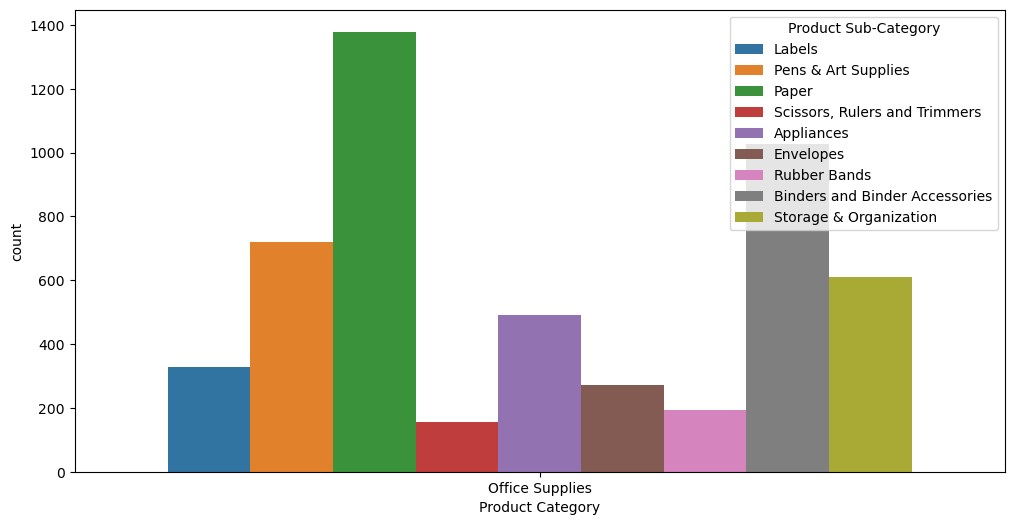

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='Product Category',data=df[df['Product Category']=='Office Supplies'],hue="Product Sub-Category")
plt.show()

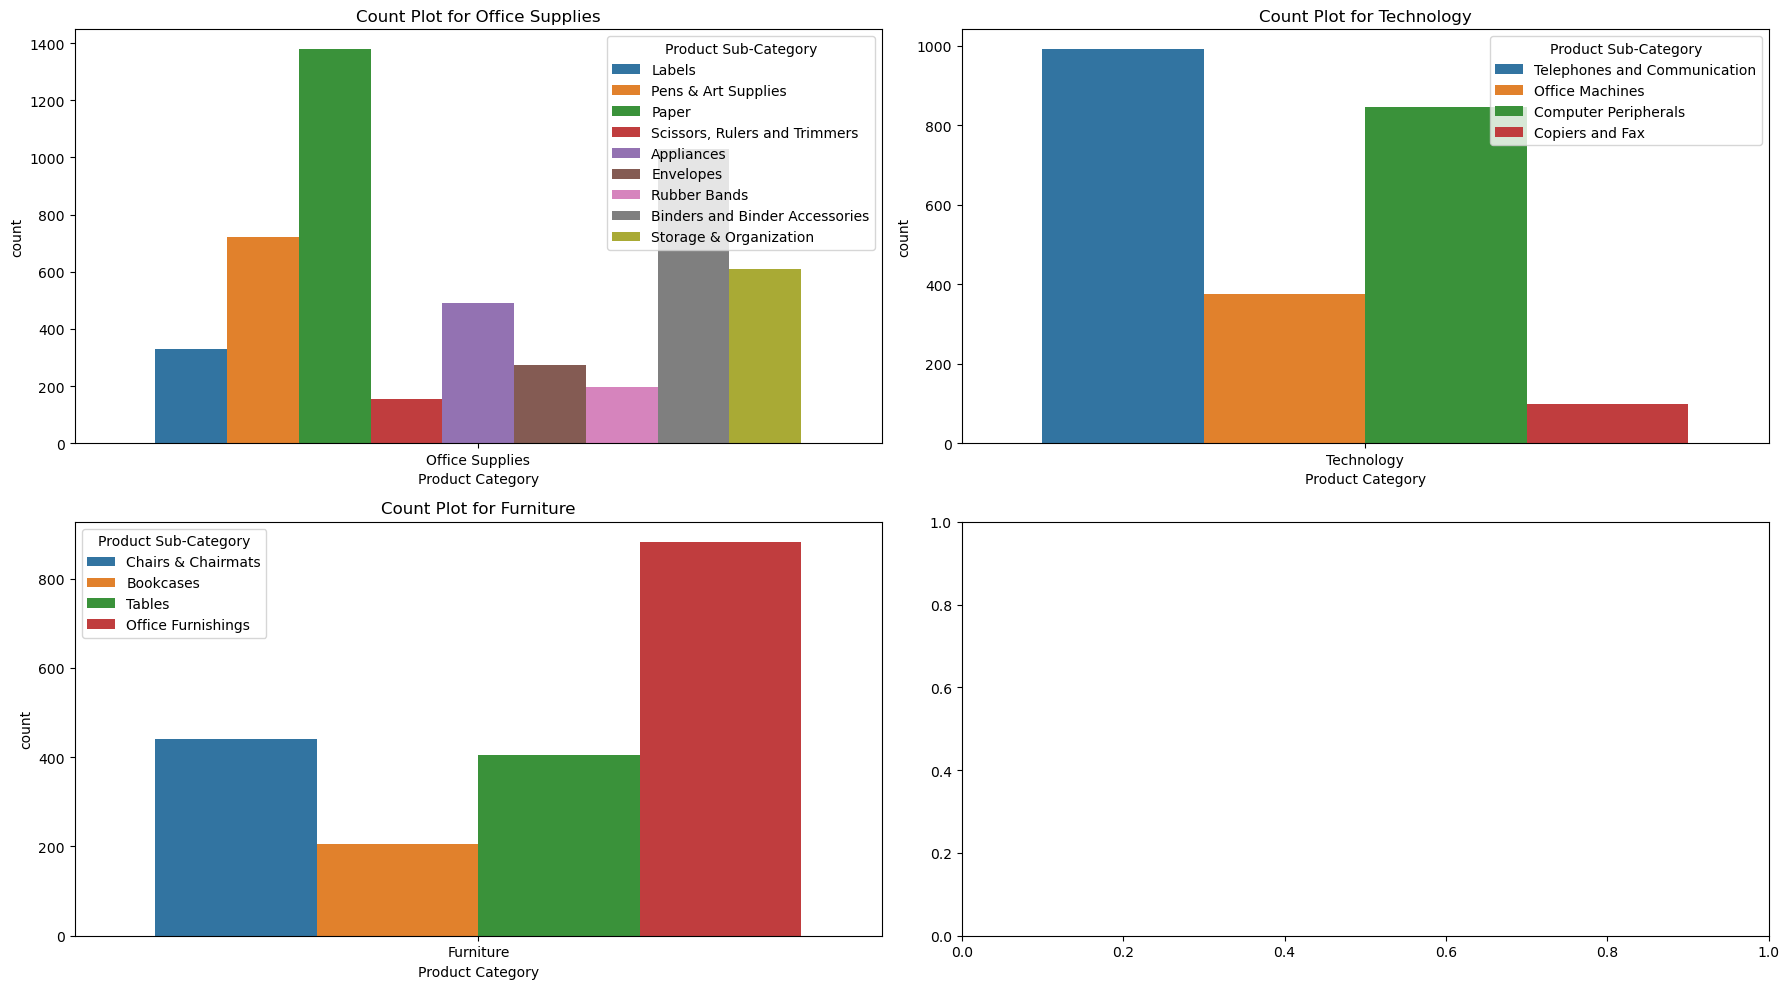

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))


axes[0,0].set_title('Count Plot for Office Supplies')
sns.countplot(x='Product Category',data=df[df['Product Category']=='Office Supplies'],hue="Product Sub-Category",ax=axes[0,0])


sns.countplot(x='Product Category',data=df[df['Product Category']=='Technology'],hue="Product Sub-Category",ax=axes[0,1])

axes[0,1].set_title('Count Plot for Technology')

sns.countplot(x='Product Category',data=df[df['Product Category']=='Furniture'],ax=axes[1,0],hue="Product Sub-Category")

axes[1,0].set_title('Count Plot for Furniture')

plt.savefig("Desktop\\Product_Category_&_SubCategory.png")


plt.tight_layout()
plt.show()


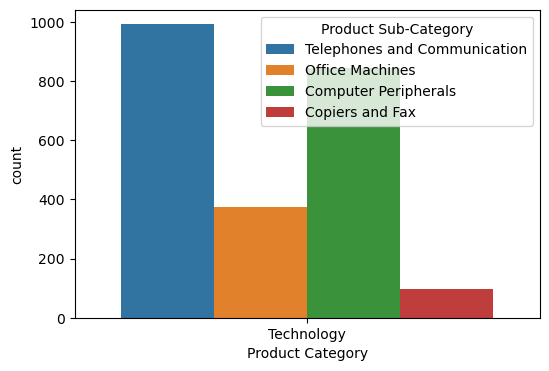

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=df[df['Product Category']=='Technology'],hue="Product Sub-Category")
plt.show()

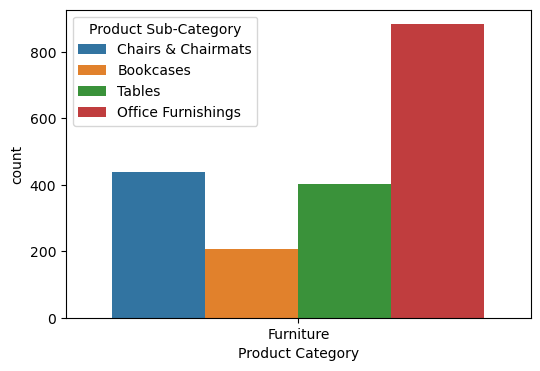

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=df[df['Product Category']=='Furniture'],hue="Product Sub-Category")
plt.show()

In [36]:
df=pd.read_excel("Superstore_USA.xlsx")
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [37]:
df['Order Year']=df['Order Date'].dt.year
df['Order Year']

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Year, Length: 9426, dtype: int32

In [38]:
df['Order Year'].value_counts().reset_index()

,Order Year,count
0,2013,3054
1,2012,2241
2,2011,2179
3,2010,1952


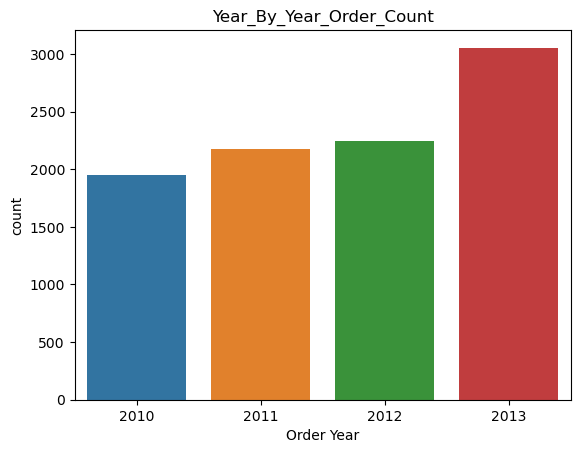

In [39]:
sns.countplot(x=df['Order Year'])
plt.title("Year_By_Year_Order_Count")
plt.savefig("Desktop\\Year_By_Year_Order.png")
plt.show()


In [40]:
profit=df.groupby("Product Category")["Profit"].sum().reset_index().sort_values('Profit',ascending=False)
profit

,Product Category,Profit
2,Technology,683097.884748
1,Office Supplies,451990.216492
0,Furniture,177354.298188


In [41]:
sale=df.groupby("Product Category")["Sales"].sum().reset_index().sort_values('Sales',ascending=False)
sale

,Product Category,Sales
2,Technology,3514982.03
0,Furniture,3178623.74
1,Office Supplies,2258325.55


In [42]:
(((profit['Profit'])/sale['Sales'])*100).reset_index()

# print({percent_profit:.2f}%)

,index,0
0,0,5.579594
1,1,20.014396
2,2,19.433894


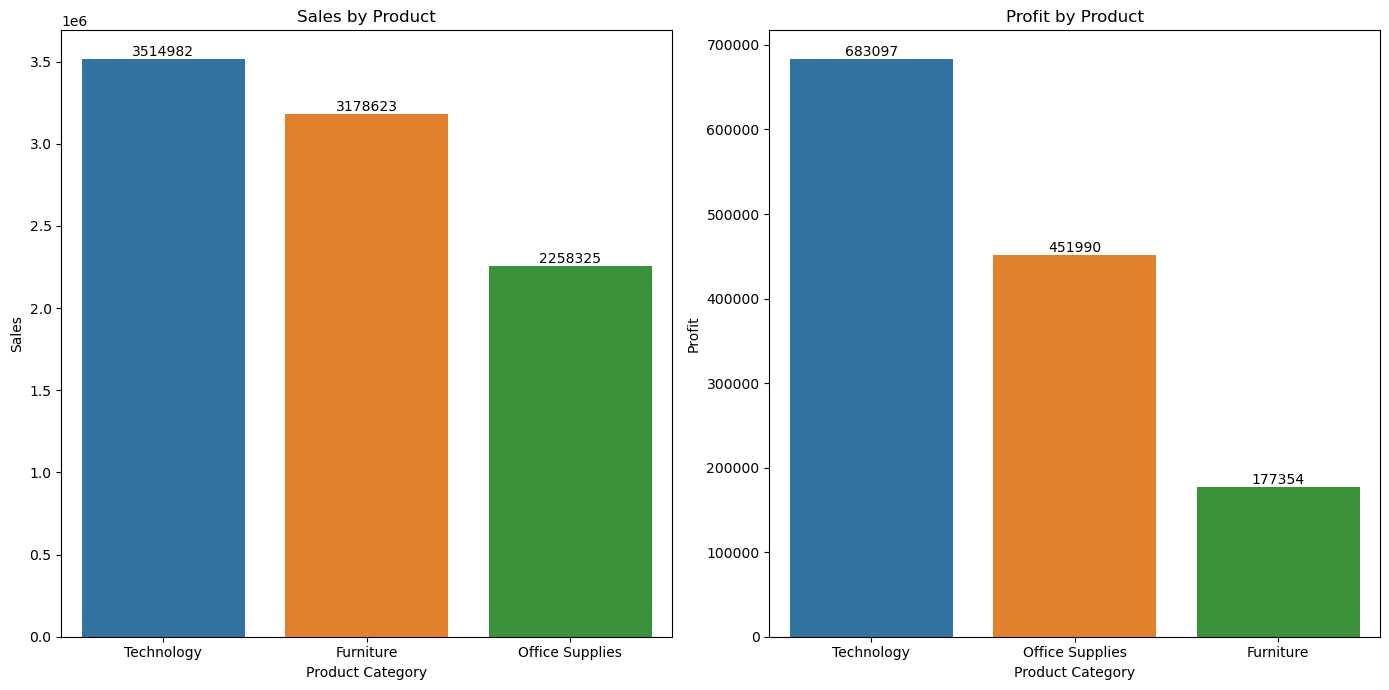

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot Sales bar chart
ax=sns.barplot(x='Product Category', y='Sales', data=sale, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
axes[0].set_title('Sales by Product')

# Plot Profit bar chart
ax=sns.barplot(x='Product Category', y='Profit', data=profit, ax=axes[1])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
axes[1].set_title('Profit by Product')

plt.savefig("Desktop\\Compare product by sales vs Profit")

plt.tight_layout()
plt.show()


In [44]:
df['Region'].value_counts()

Region
Central    2899
East       2289
West       2284
South      1954
Name: count, dtype: int64

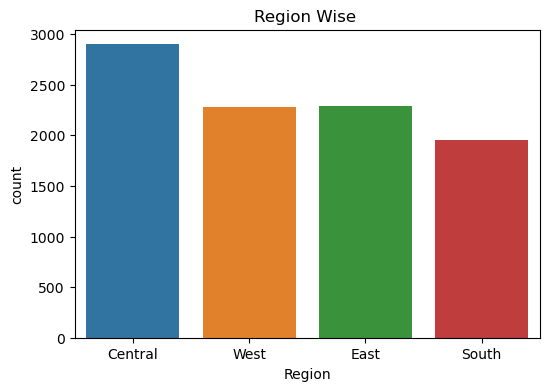

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Region'],data=df)
plt.savefig("Desktop\\Region_Distribution")
plt.title("Region Wise ")
plt.show()

# State Wise Distribution

In [46]:
state_top=df.groupby('State or Province')['Row ID'].count().reset_index().sort_values("Row ID",ascending=False).head(5)
state_top

,State or Province,Row ID
3,California,1021
41,Texas,646
11,Illinois,584
30,New York,574
8,Florida,522


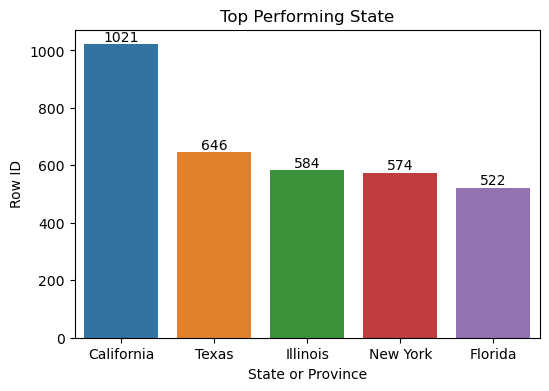

In [47]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x=state_top['State or Province'],y=state_top['Row ID'],data=df)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.title("Top Performing State")
plt.savefig("Desktop\\Top Performing State")

plt.show()

In [48]:
state_bottom=df.groupby('State or Province')['Row ID'].count().reset_index().sort_values("Row ID",ascending=False).tail(5)
state_bottom

,State or Province,Row ID
32,North Dakota,34
39,South Dakota,28
48,Wyoming,21
37,Rhode Island,20
6,Delaware,15


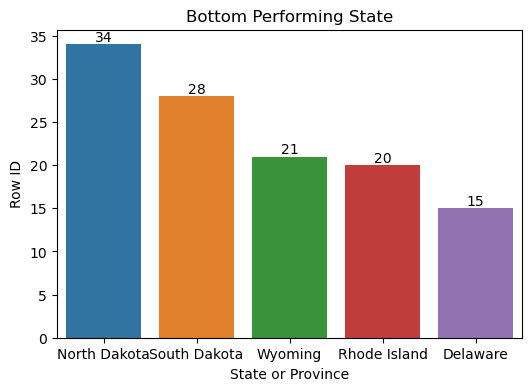

In [49]:
plt.figure(figsize=(6,4))
ax=sns.barplot(x=state_bottom['State or Province'],y=state_bottom['Row ID'],data=df)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.title("Bottom Performing State")
plt.savefig("Desktop\\Bottom Performing State")

plt.show()

In [50]:
margin=df.groupby('Product Category')['Product Base Margin'].sum().reset_index()
margin

,Product Category,Product Base Margin
0,Furniture,1127.68
1,Office Supplies,2376.77
2,Technology,1286.57


Text(0.5, 1.0, 'Distribution of Margin On Categoty')

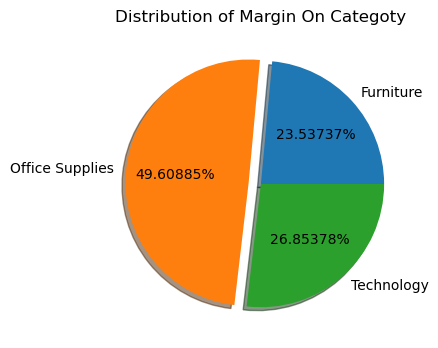

In [51]:
plt.figure(figsize=(6,4))
plt.pie(margin['Product Base Margin'],labels=margin['Product Category'],data=margin,autopct='%0.05f%%',shadow=True,explode=[0,0.1,0])

plt.savefig("Desktop\\Margin")
plt.title("Distribution of Margin On Categoty")

# Year By Year Sales

In [52]:
total_sales=df['Sales'].sum()

In [53]:
total_sales

8951931.32

In [54]:
total_sales_by_year=df.groupby(['Order Year',
                                'Product Category'])['Sales'].sum().reset_index().sort_values('Order Year',ascending=True)
total_sales_by_year

,Order Year,Product Category,Sales
0,2010,Furniture,660699.31
1,2010,Office Supplies,551368.62
2,2010,Technology,712264.95
3,2011,Furniture,681647.16
4,2011,Office Supplies,440723.75
5,2011,Technology,822136.52
6,2012,Furniture,936602.57
7,2012,Office Supplies,520062.25
8,2012,Technology,774066.36
9,2013,Furniture,899674.70


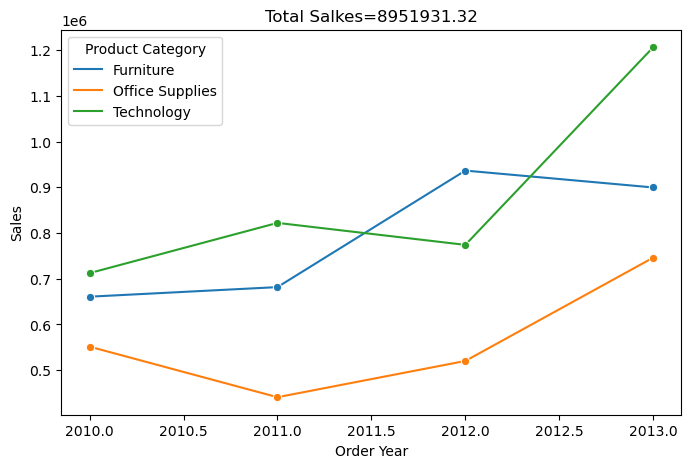

In [55]:
plt.figure(figsize=(8,5))
sns.lineplot(x=total_sales_by_year['Order Year'],y=total_sales_by_year['Sales'],
             data=total_sales_by_year,
            marker='o',hue="Product Category")
plt.title("Total Salkes=8951931.32")
plt.savefig("Desktop\\YearByYear_Sales.png")
plt.show()

# Year By Year Profit

In [56]:
profit=df['Profit'].sum()
profit

1312442.3994276498

In [57]:
total_profit_by_year=df.groupby(['Order Year',
                                'Product Category'])['Profit'].sum().reset_index().sort_values('Order Year',ascending=True)
total_profit_by_year

,Order Year,Product Category,Profit
0,2010,Furniture,52623.125736
1,2010,Office Supplies,89525.009537
2,2010,Technology,71176.004064
3,2011,Furniture,15650.307101
4,2011,Office Supplies,112658.458056
5,2011,Technology,169538.978041
6,2012,Furniture,75071.304344
7,2012,Office Supplies,72970.664328
8,2012,Technology,206031.604608
9,2013,Furniture,34009.561006


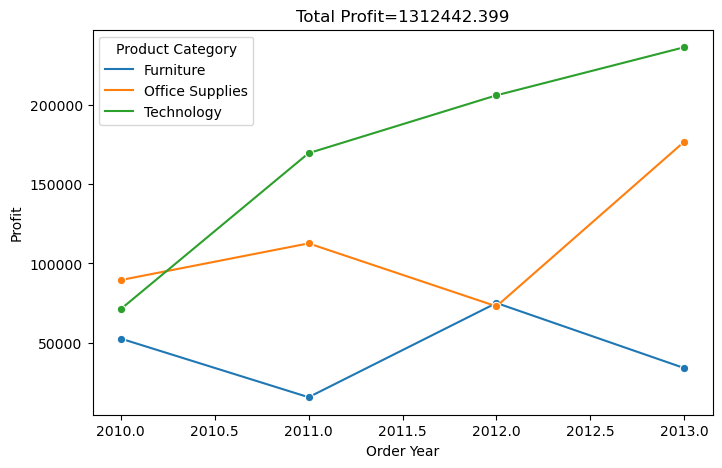

In [58]:
plt.figure(figsize=(8,5))
sns.lineplot(x=total_profit_by_year['Order Year'],y=total_profit_by_year['Profit'],
             data=total_profit_by_year,marker='o',hue="Product Category")
plt.title("Total Profit=1312442.399")
plt.savefig("Desktop\\YearByYear_Profit.png")
plt.show()

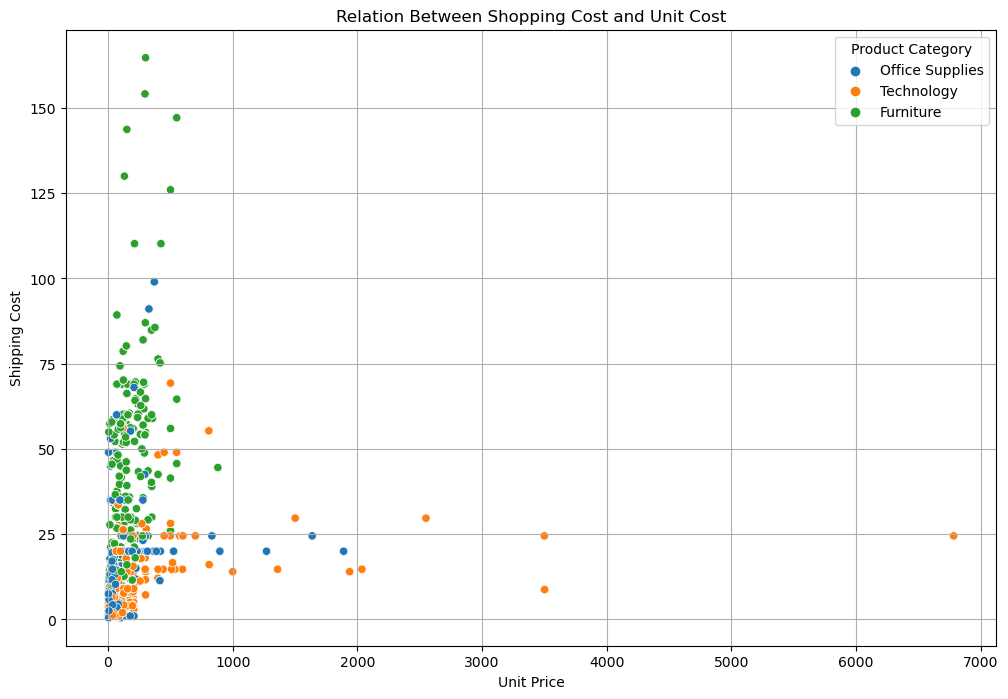

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Unit Price',y='Shipping Cost',data=df, hue='Product Category')
plt.grid()
plt.title("Relation Between Shopping Cost and Unit Cost")
plt.savefig("Desktop\\ScatterPlot.png")
plt.show()

# Distribution of Profit and Cost amount

C:\Users\DHIRAJ\anaconda33\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

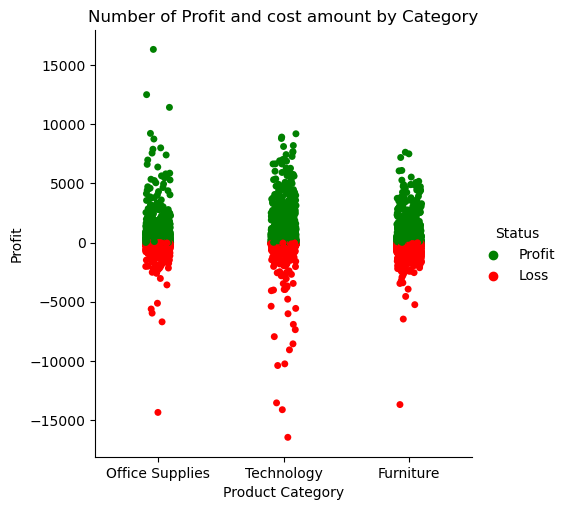

In [60]:
plt.figure(figsize=(12,6))
df['Status'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

palette={'Profit':'green','Loss':'red'}
sns.catplot(data=df,x='Product Category',y='Profit',palette=palette,hue='Status')
plt.title("Number of Profit and cost amount by Category")
plt.savefig("Desktop\\catplot.png")
plt.show()

In [61]:
total_profit=df[df['Profit']>0]['Profit'].sum()
print(total_profit)
total_loss=df[df['Profit']<0]['Profit'].sum()
print(total_loss)

2475183.2352108
-1162740.83578315


In [62]:
net_profit=total_profit+total_loss
net_profit

1312442.39942765

In [63]:
summary = pd.DataFrame({
    'Category': ['Total Profit', 'Total Loss','Net Profit'],
    'Amount': [total_profit, total_loss,net_profit]
})


In [64]:
summary

,Category,Amount
0,Total Profit,2.475183e+06
1,Total Loss,-1.162741e+06
2,Net Profit,1.312442e+06


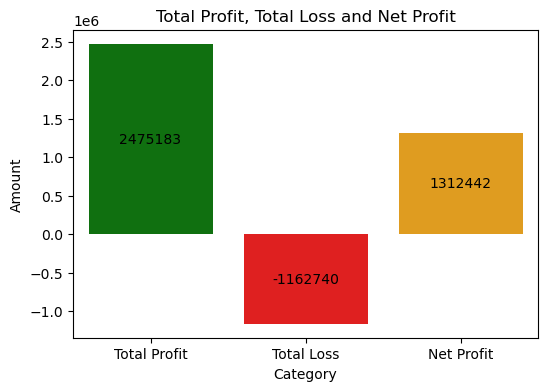

In [65]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Category', y='Amount', data=summary, palette=['green', 'red','Orange'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')
plt.title('Total Profit, Total Loss and Net Profit')
plt.savefig("Desktop\\Profit vs Loss.png")
plt.show()
